In [1]:
import pandas
from matplotlib import pyplot as plt

In [2]:
df = pandas.read_csv('pace_instances.csv', sep=',')
df.describe()

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,after heavy non-edge,forbs heavy non-edge,time heavy non-edge,spend heavy non-edge,lower after heavy non-edge,after forced single merge,forbs forced single merge,time forced single merge,spend forced single merge,lower after forced single merge
count,196.00000,196.000000,196.000000,196.000000,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.0,196.000000,196.000000,196.000000,1.960000e+02,196.000000,196.000000
mean,98.50000,186.750000,6543.581633,0.872449,1.275525e+08,1922.846939,958.887755,4156.591837,1908.448980,1810.102041,...,169.270408,6722.489796,21.872449,0.0,1908.413265,62.862245,2969.336735,1.217786e+06,1159.989796,1907.433673
std,56.72448,104.192739,9313.157220,0.334443,3.344429e+08,2870.075648,1766.578881,16432.384233,2853.895555,2701.064117,...,99.249974,17021.072154,41.446525,0.0,2853.911338,96.747180,13138.597402,7.830824e+06,1889.446496,2853.187587
min,1.00000,10.000000,11.000000,0.000000,3.000000e+00,3.000000,0.000000,0.000000,3.000000,3.000000,...,6.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000
25%,49.75000,113.000000,1213.500000,1.000000,2.740000e+02,274.000000,61.750000,56.750000,272.000000,242.000000,...,100.000000,19.000000,2.000000,0.0,271.750000,0.000000,0.000000,4.562250e+03,87.750000,272.250000
50%,98.50000,184.000000,3042.000000,1.000000,7.760000e+02,772.000000,319.500000,213.500000,772.000000,760.000000,...,158.500000,306.000000,6.000000,0.0,772.000000,11.000000,4.000000,3.063400e+04,283.500000,772.000000
75%,147.25000,250.000000,6913.000000,1.000000,3.875250e+03,2459.250000,1005.500000,1165.750000,2438.250000,2318.750000,...,227.250000,7983.000000,24.250000,0.0,2438.000000,91.000000,147.500000,2.450938e+05,1419.250000,2439.500000
max,196.00000,620.000000,70027.000000,1.000000,1.000000e+09,20429.000000,13799.000000,187898.000000,20402.000000,20327.000000,...,619.000000,148807.000000,317.000000,0.0,20402.000000,560.000000,143176.000000,1.041013e+08,11608.000000,20407.000000


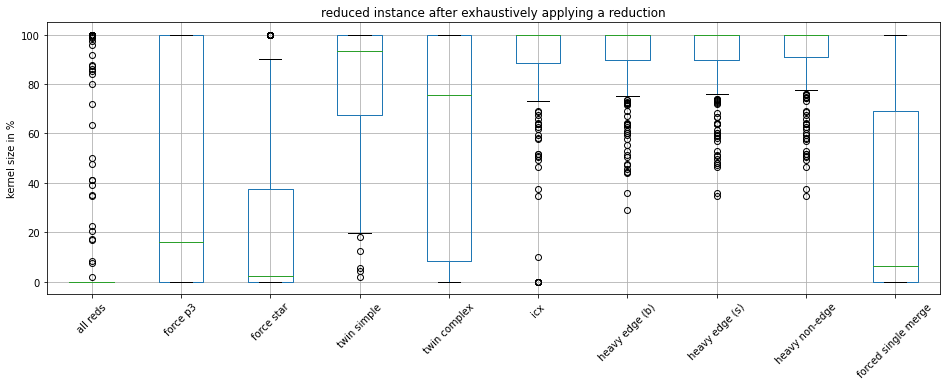

In [3]:
reds = ["all reds", "force p3", "force star", "twin simple", "twin complex", "icx", "heavy edge (b)", "heavy edge (s)", "heavy non-edge", "forced single merge"]

for r in reds:
    df[f'after% {r}'] = 100 * df[f'after {r}'] / df['n']
    
after_sizes = ['after% ' + r for r in reds]
df.describe()

plt.gcf().set_size_inches(16,5)
plt.gca().set_ylabel('kernel size in %')
plt.gca().set_title('reduced instance after exhaustively applying a reduction')
df.boxplot(after_sizes, rot=45)
plt.gca().set_xticklabels(reds)

plt.savefig('reductions.pdf', bbox_inches='tight')

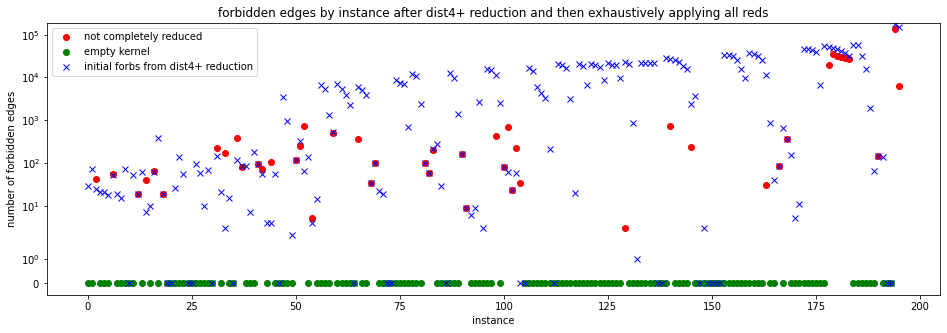

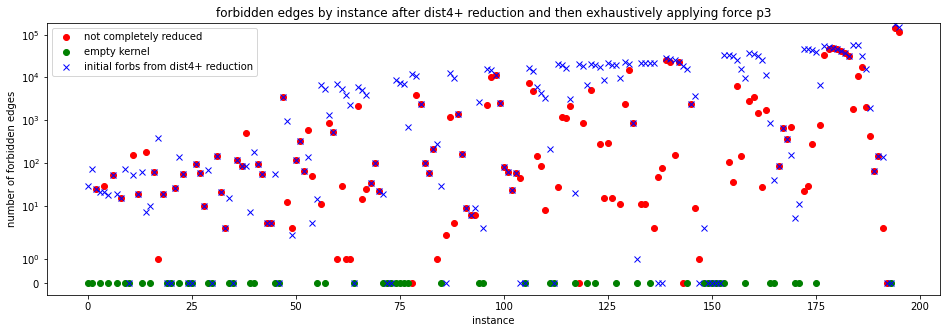

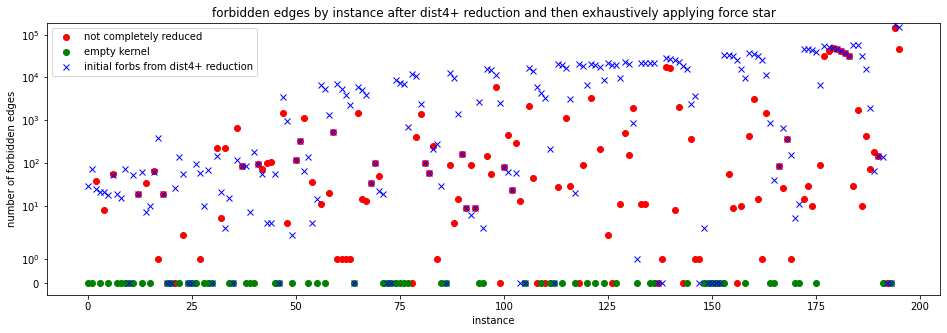

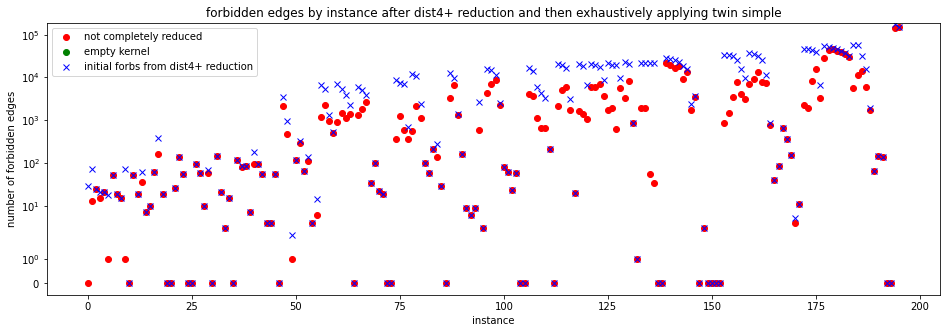

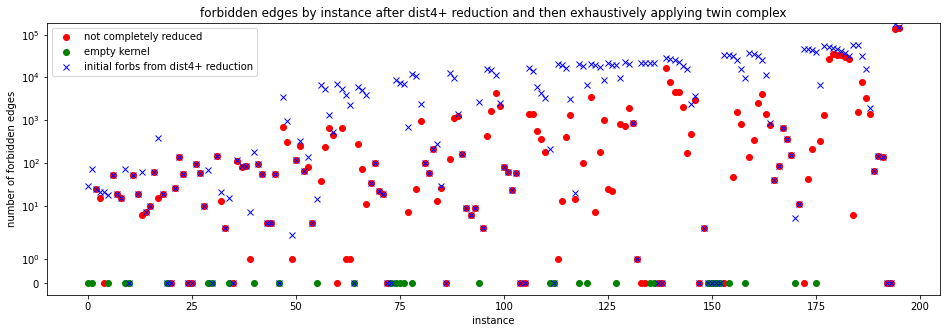

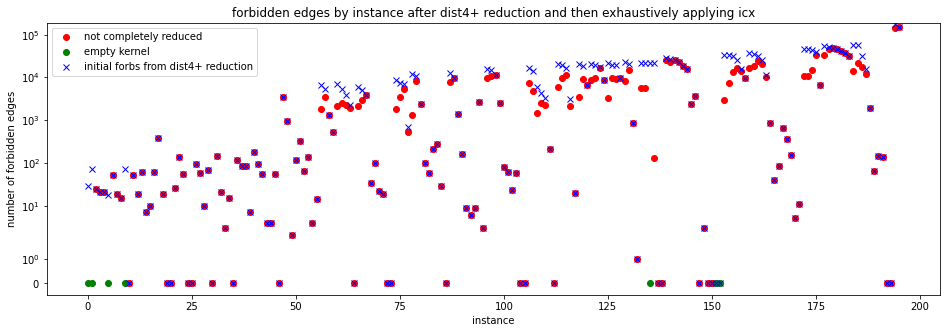

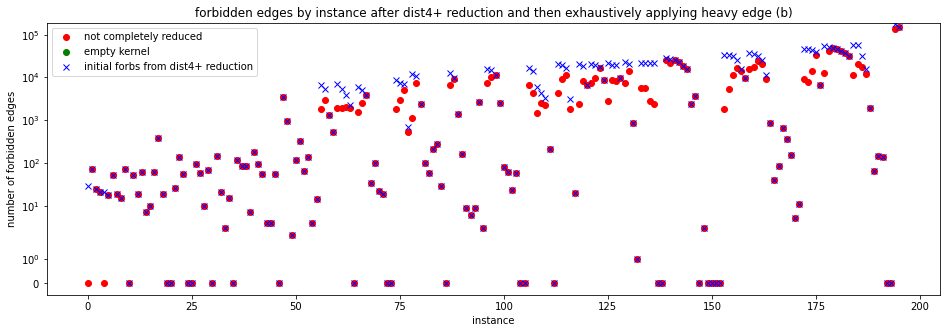

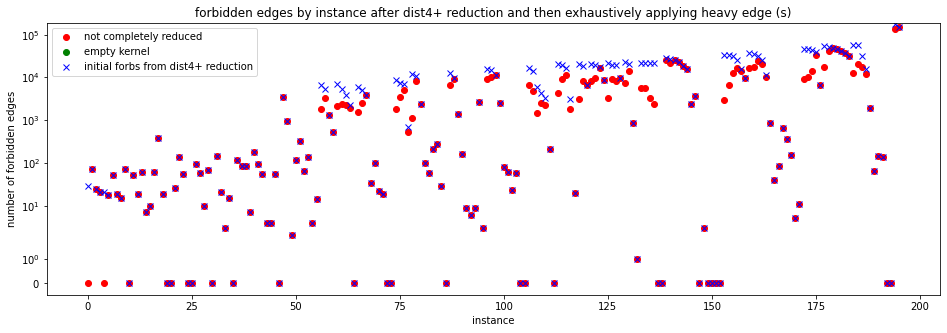

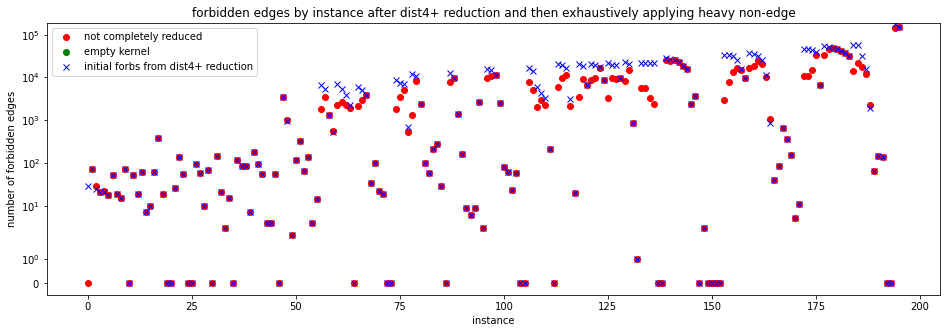

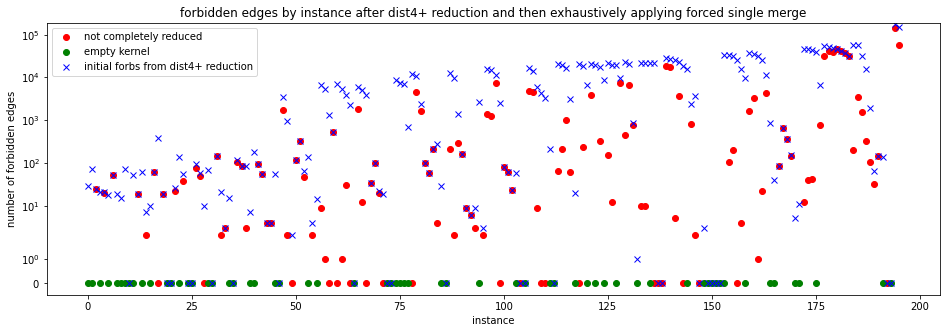

In [4]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'forbidden edges by instance after dist4+ reduction and then exhaustively applying {r}')
    df[df[f'after {r}']>0][f'forbs {r}'].plot(style='ro', label='not completely reduced')
    df[df[f'after {r}']==0][f'forbs {r}'].plot(style='go', label='empty kernel')
    df[f'dist4+'].plot(style='bx', label='initial forbs from dist4+ reduction')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('number of forbidden edges')
    plt.gca().set_yscale('symlog')
    plt.gca().set_ylim(bottom=-0.5)
    plt.legend()
    plt.show()

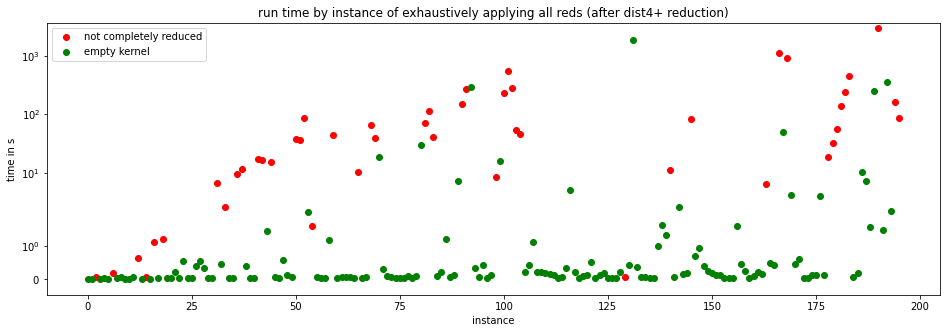

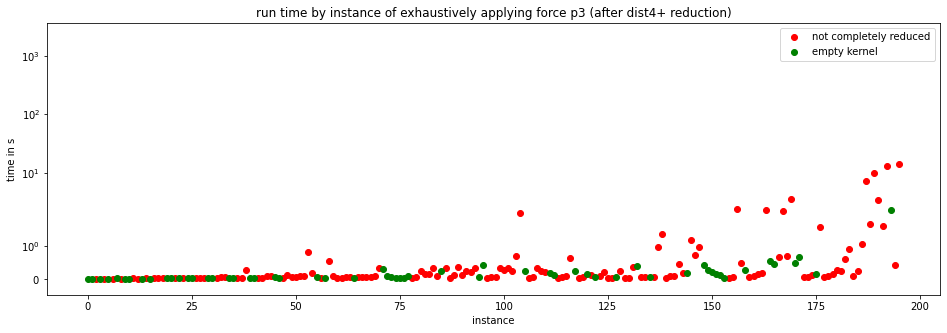

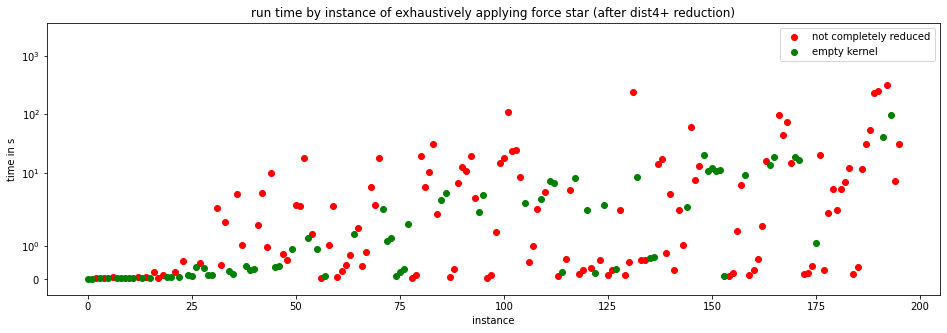

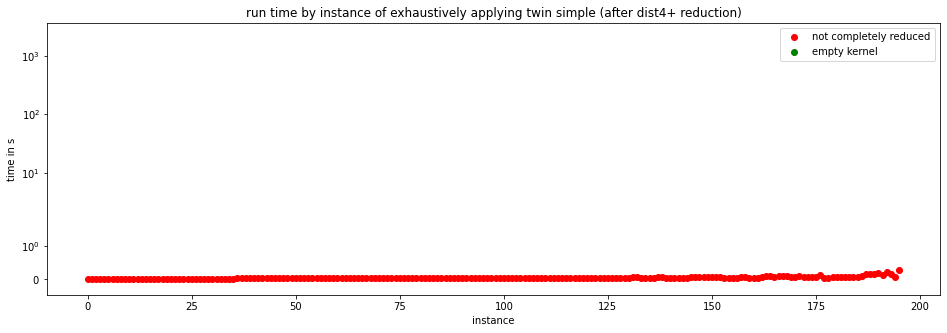

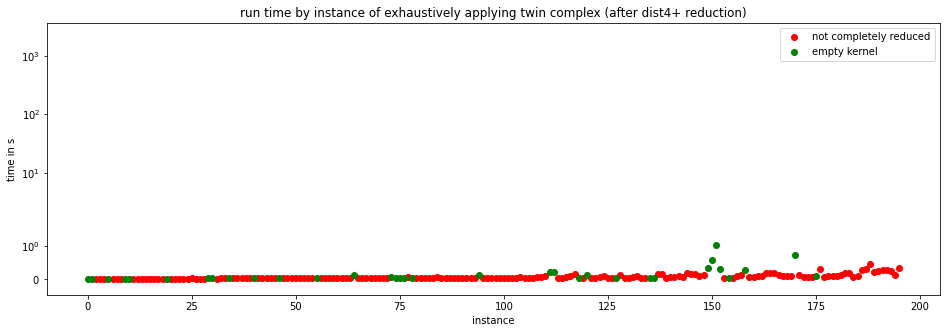

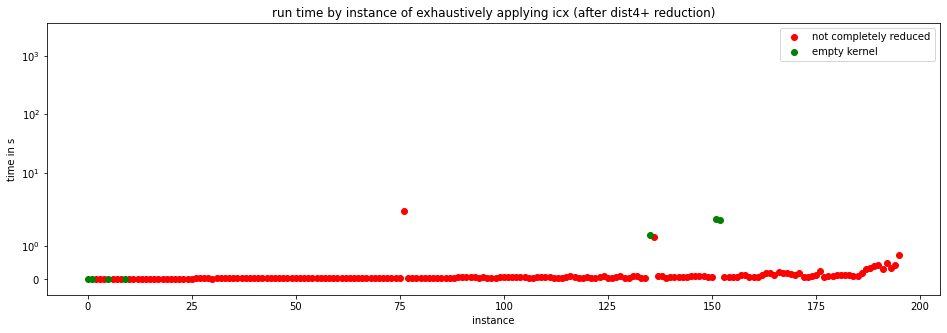

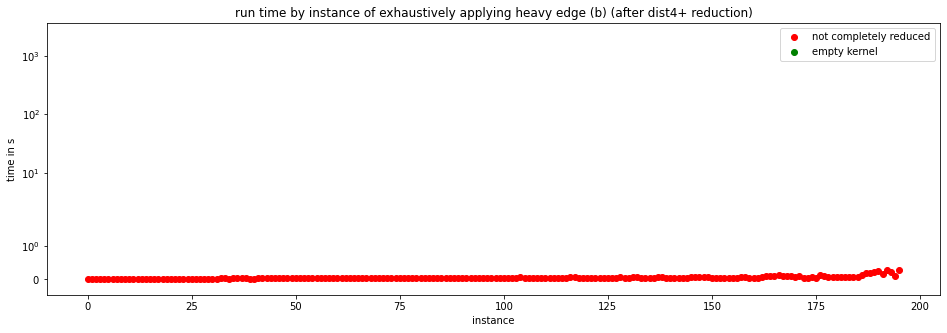

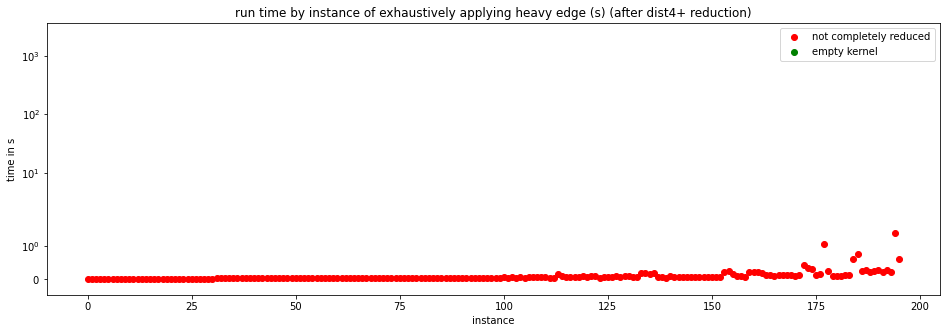

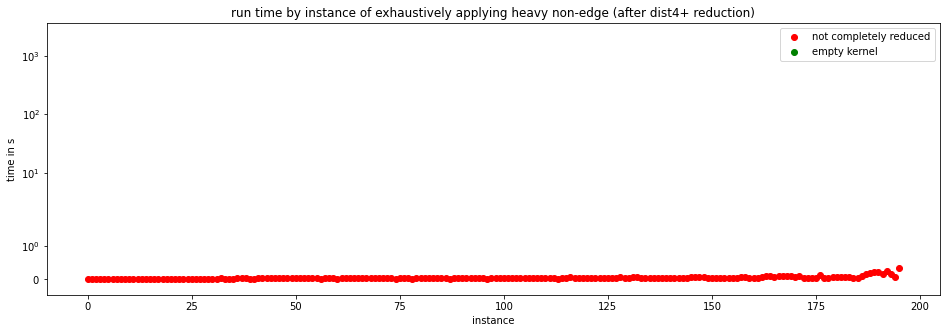

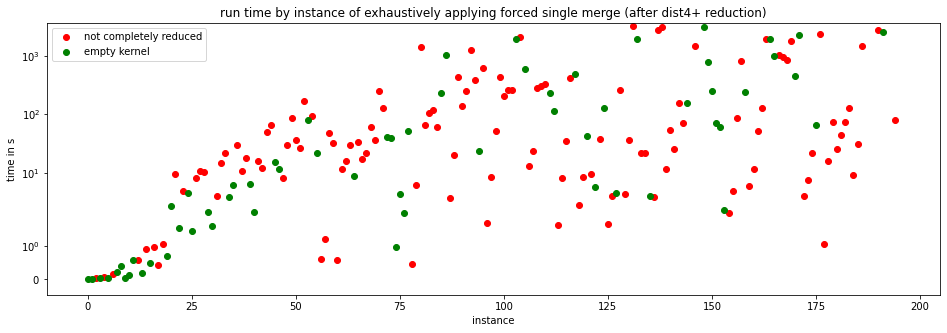

In [5]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'run time by instance of exhaustively applying {r} (after dist4+ reduction)')
    (df[df[f'after {r}']>0][f'time {r}'] / 1000).plot(style='ro', label='not completely reduced')
    (df[df[f'after {r}']==0][f'time {r}'] / 1000).plot(style='go', label='empty kernel')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('time in s')
    plt.gca().set_yscale('symlog')
    plt.gca().set_ylim(bottom=-0.5, top=60*60)
    plt.legend()
    plt.show()

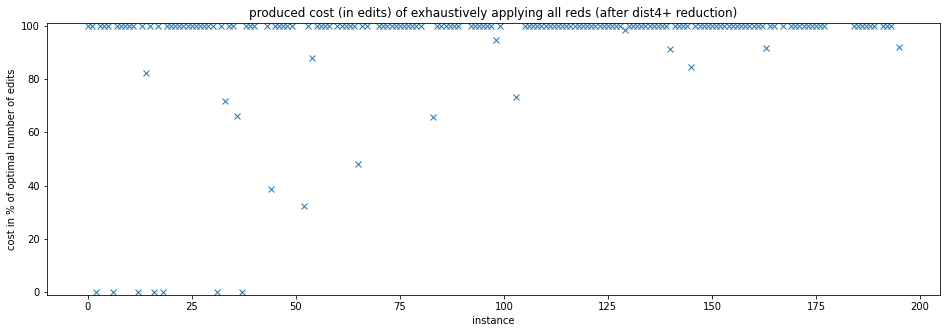

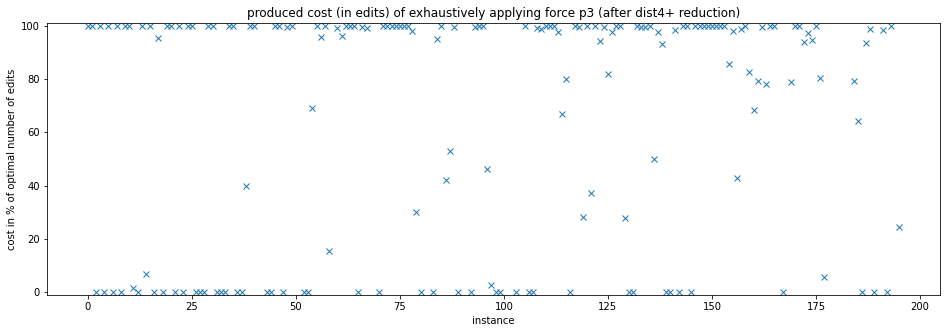

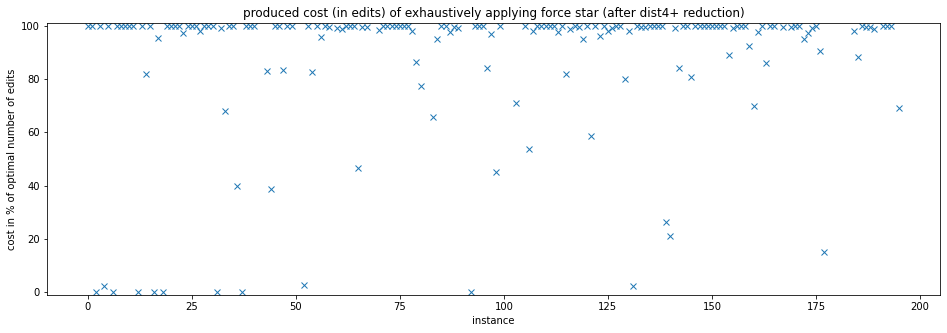

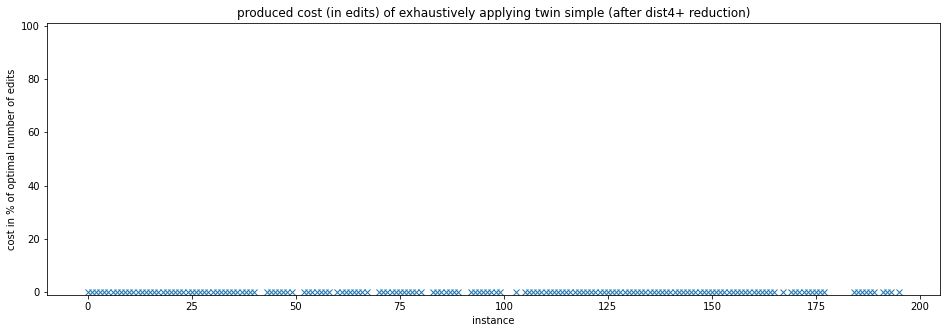

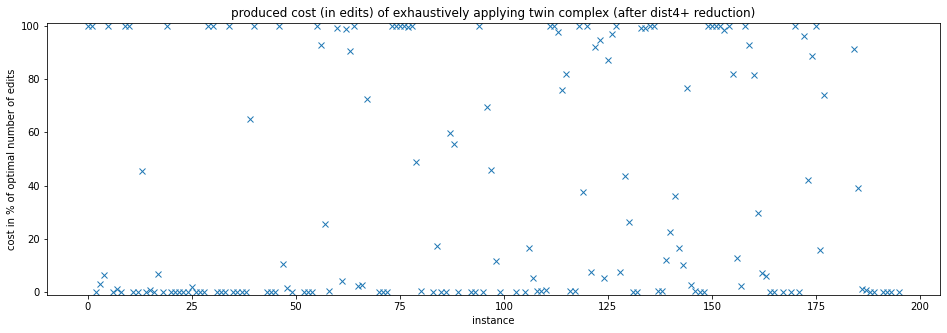

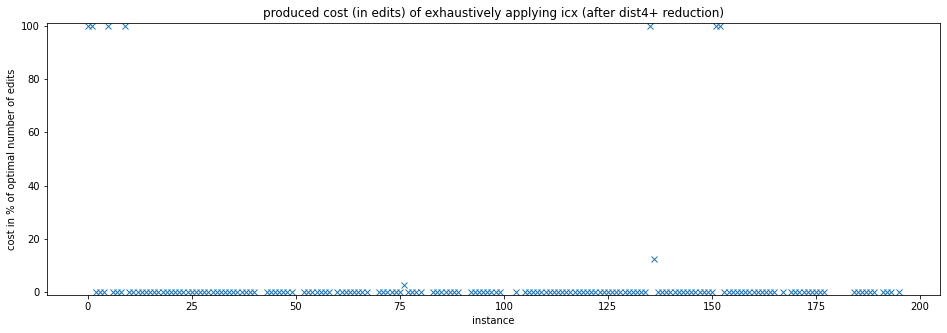

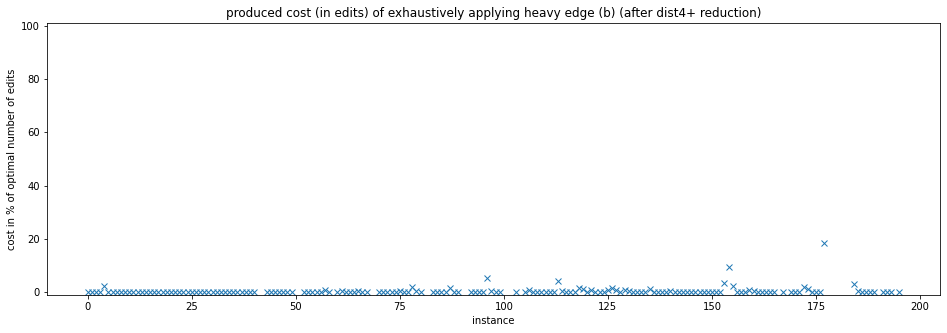

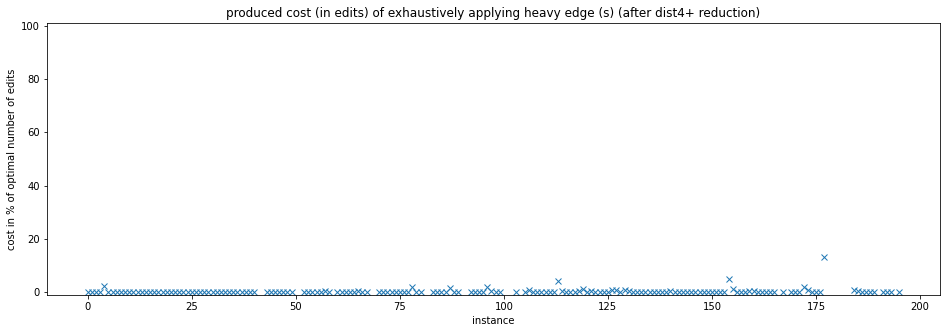

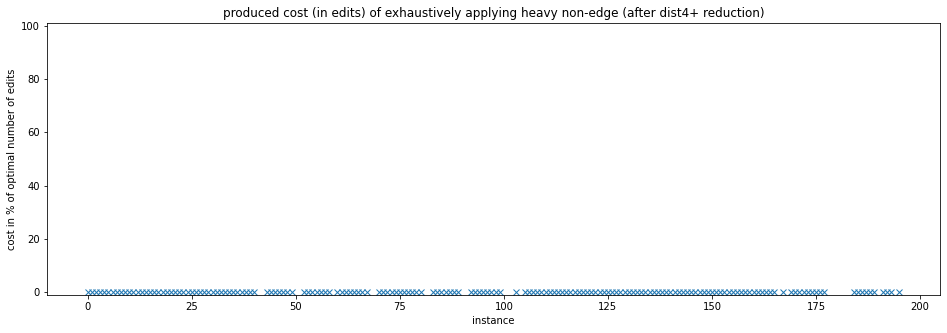

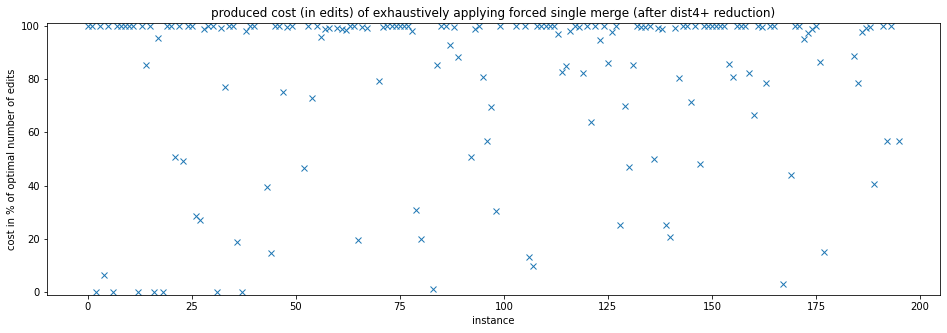

In [6]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'produced cost (in edits) of exhaustively applying {r} (after dist4+ reduction)')
    ds = df[df.solved==1]
    (ds[f'spend {r}'] / ds.opt * 100).plot(style='x')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('cost in % of optimal number of edits')
    plt.gca().set_ylim(bottom=-1, top=101)
    plt.show()

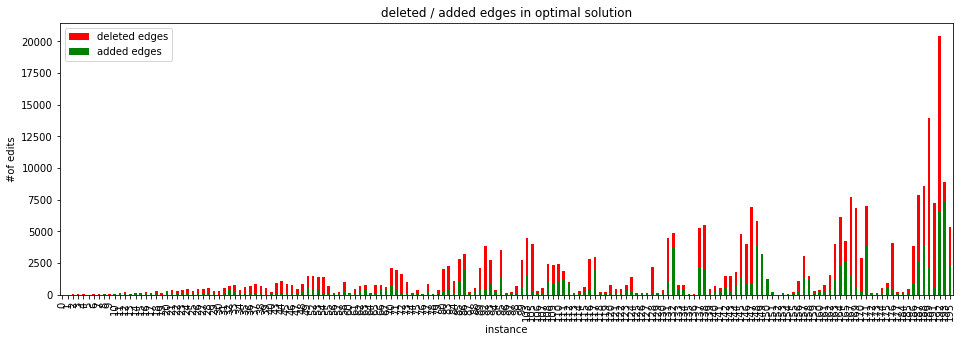

In [7]:
plt.gcf().set_size_inches(16,5)
plt.title(f'deleted / added edges in optimal solution')
ds = df[df.solved==1]
(ds.dels+ds.adds).plot.bar(color='r', label='deleted edges')
ds.adds.plot.bar(color='g', label='added edges')
plt.xlabel('instance')
plt.ylabel('#of edits')
plt.legend()
plt.show()

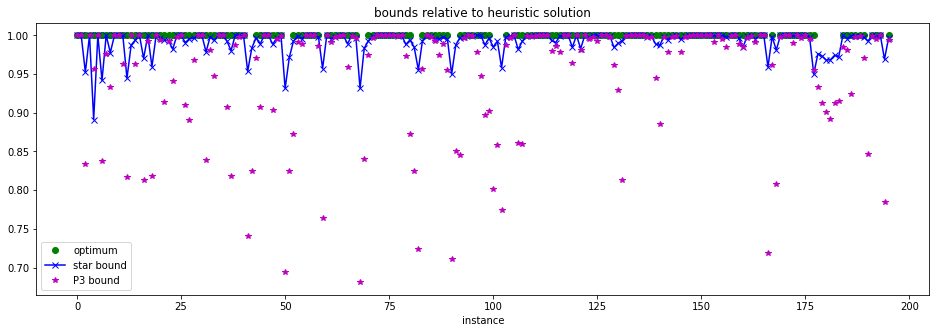

In [8]:
ax = plt.gca()
plt.gcf().set_size_inches(16,5)

solved = df.solved==True
low_rel = df.low_star/df.upper
opt_rel = df.opt/df.upper
p3_rel = df.low_p3/df.upper

ax.plot(opt_rel[solved], 'go', label='optimum')
ax.plot(low_rel, 'bx-', label='star bound')
ax.plot(p3_rel, 'm*', label='P3 bound')


ax.set_xlabel('instance')
ax.set_title('bounds relative to heuristic solution')
ax.legend()

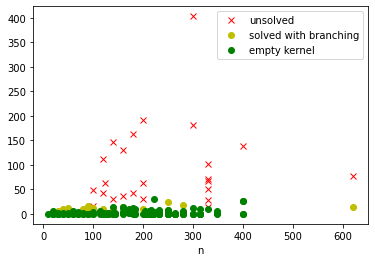

In [9]:
df['gap'] = df.upper - df.low_star
df[df.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')
ds = df[df.solved==1]
ds[ds['after all reds']>0].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
ds[ds['after all reds']==0].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.show()

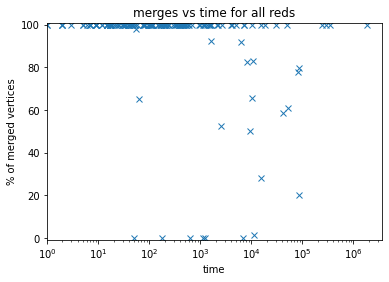

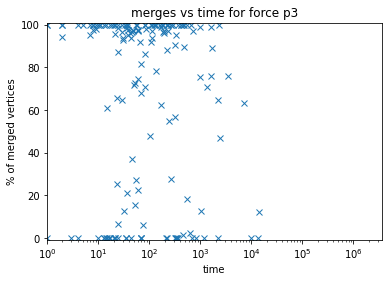

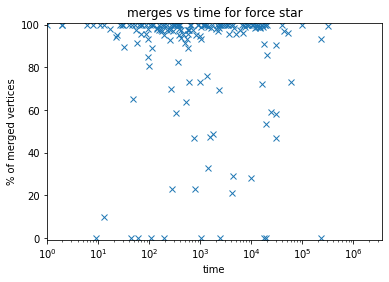

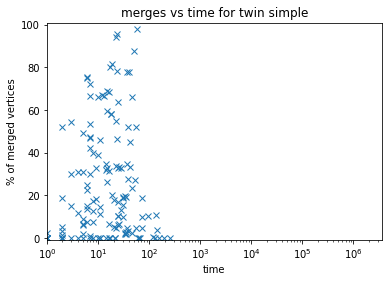

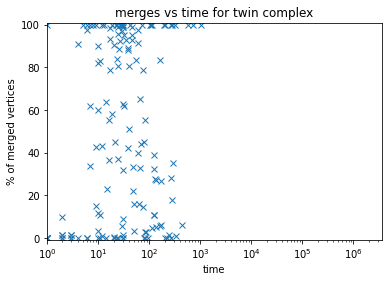

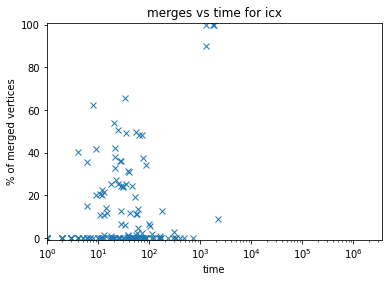

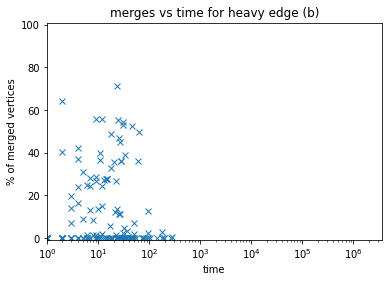

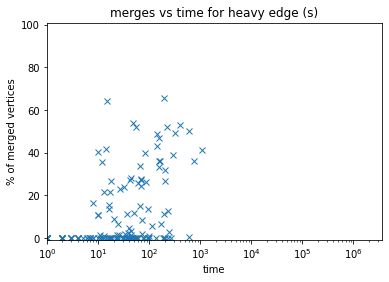

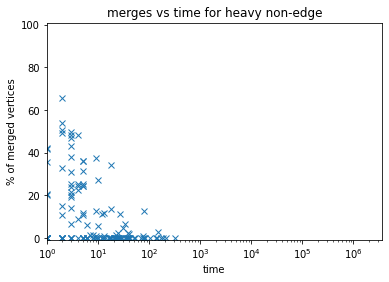

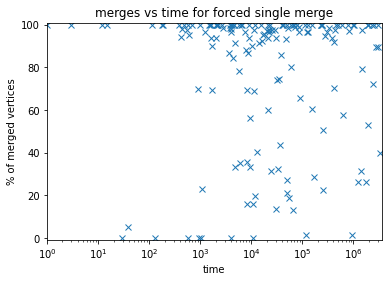

In [21]:
ds = df[df.solved==1]
for r in reds:
    plt.title(f'merges vs time for {r}')
    merges = (ds.n - ds[f'after {r}']) / ds.n * 100
    plt.plot(ds[f'time {r}'], merges, 'x')
    plt.xlabel('time')
    plt.ylabel('% of merged vertices')
    plt.ylim(bottom=-1, top=101)
    plt.xlim(left=1,right=1000*60*60)
    plt.semilogx()
    plt.show()

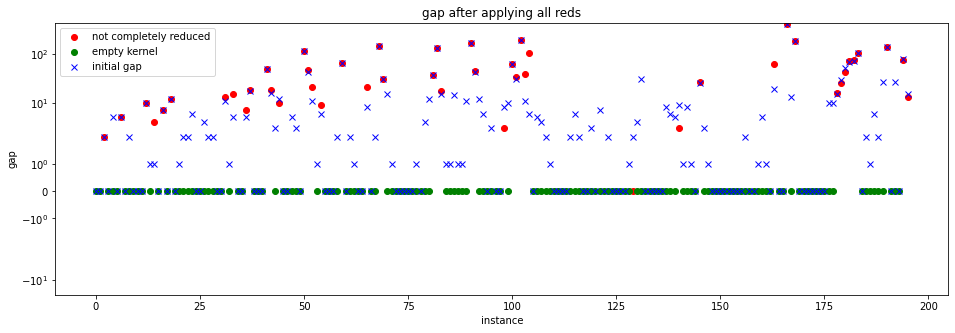

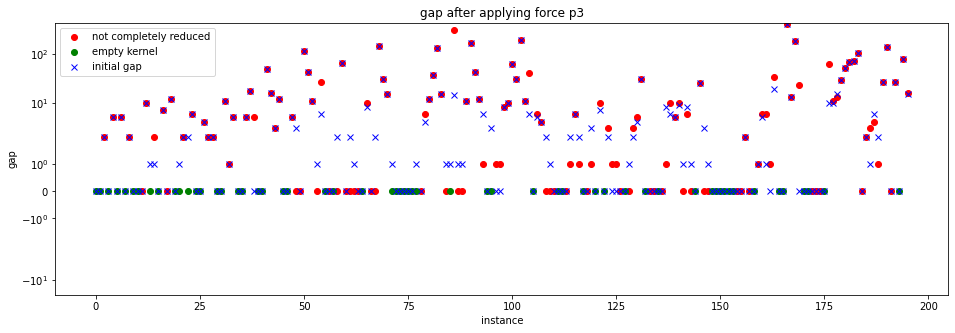

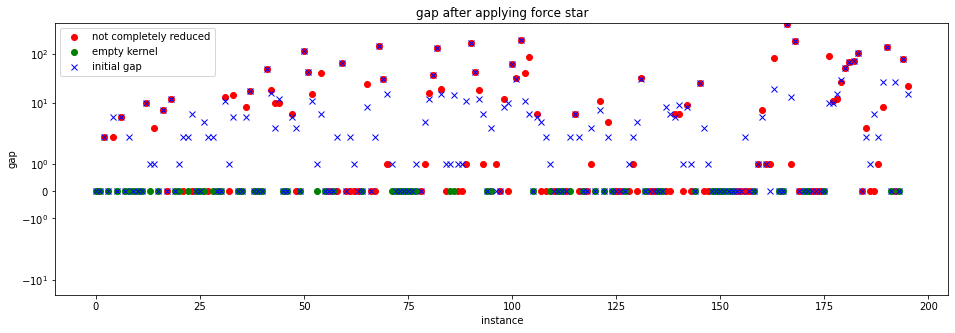

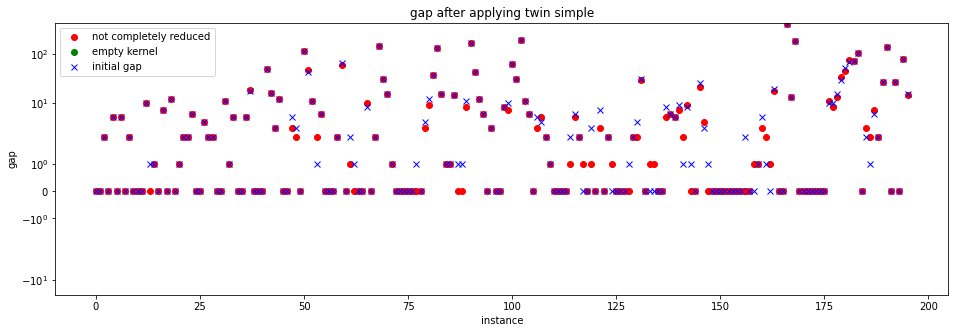

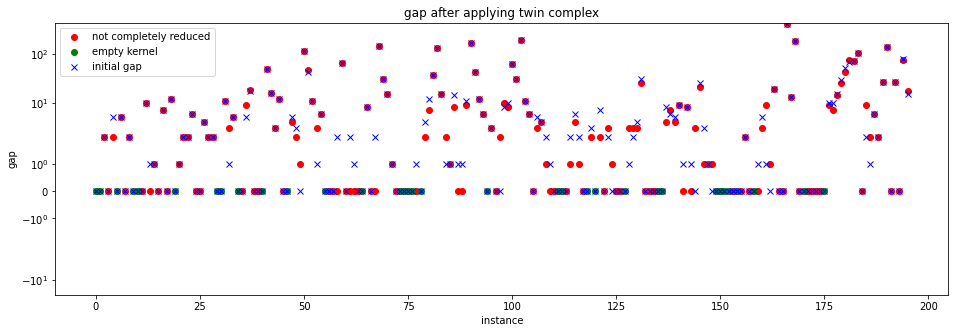

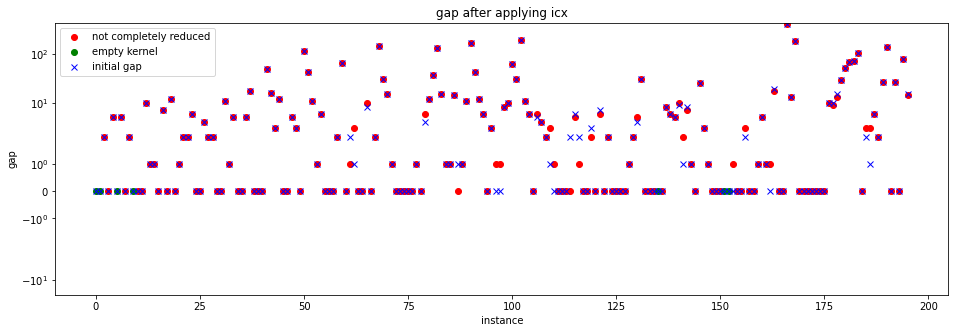

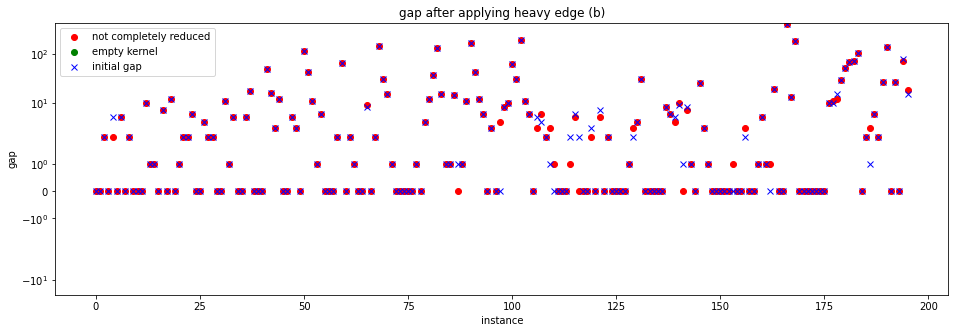

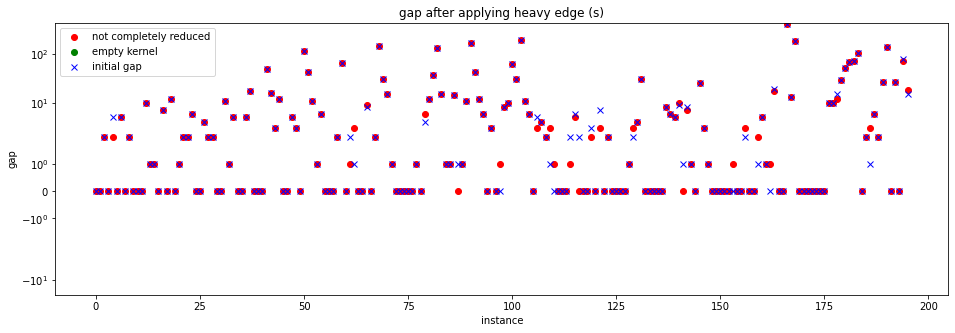

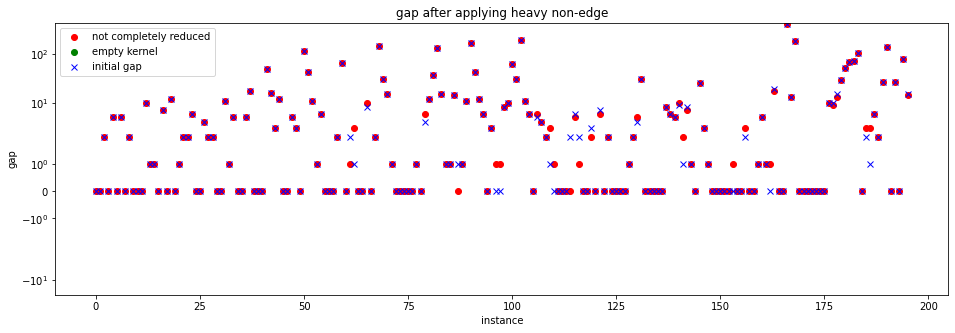

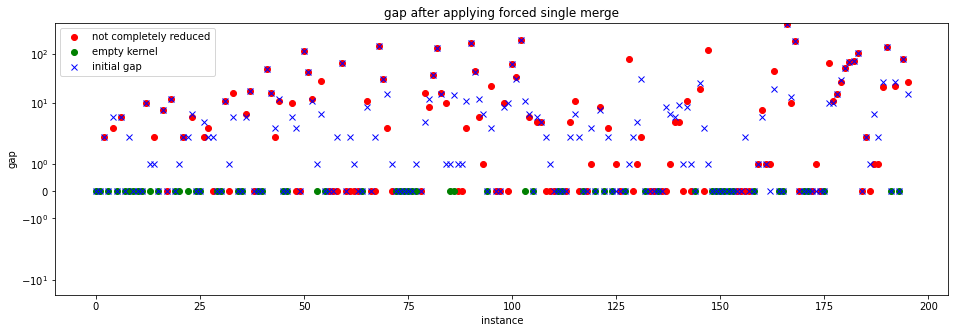

In [23]:
for r in reds:
    df[f'gap after {r}'] = df['upper'] - df[f'lower after {r}']
    plt.gcf().set_size_inches(16,5)
    plt.title(f'gap after applying {r}')
    df[df[f'after {r}']>0][f'gap after {r}'].plot(style='ro', label='not completely reduced')
    df[df[f'after {r}']==0][f'gap after {r}'].plot(style='go', label='empty kernel')
    df['gap'].plot(style='bx', label='initial gap')
    plt.xlabel('instance')
    plt.ylabel('gap')
    plt.yscale('symlog')
    #plt.ylim(bottom=-0.5)
    plt.legend()
    plt.show()